In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from collections import Counter
from pyinform import transfer_entropy
from pyinform import mutual_info


The cell above this is a python code that installs all my packages

In [3]:
df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_1.csv')
df.head()

,Unnamed: 0,Q1-pos0,Q1-pos1,Q1-pos2,Q1-pos3,Q1-pos4,Q1-pos5,Q1-pos6,Q1-pos7,Q1-pos8,...,Q4-pos390,Q4-pos391,Q4-pos392,Q4-pos393,Q4-pos394,Q4-pos395,Q4-pos396,Q4-pos397,Q4-pos398,Q4-pos399
0,0,gru,lax,pty,icn,bru,hkg,bru,hkg,bru,...,gru,icn,las,lax,jfk,mex,gru,bru,lax,icn
1,1,gru,lax,pty,icn,bru,hkg,bru,hkg,bru,...,gru,icn,las,lax,jfk,mex,gru,bru,lax,icn
2,2,gru,lax,pty,icn,bru,hkg,bru,jfk,bru,...,gru,icn,las,lax,jfk,mex,gru,bru,lax,icn
3,3,gru,lax,pty,icn,bru,hkg,bru,jfk,bru,...,gru,icn,las,lax,jfk,las,gru,bru,lax,icn
4,4,gru,lax,pty,icn,bru,hkg,bru,jfk,bru,...,gru,icn,las,lax,jfk,las,gru,bru,lax,icn


In [11]:
colors_to_numbers = {'gru': 0, 'pty': 1, 'jfk': 2, 'lax': 3, 'las': 4, 'lis': 5, 'bru': 6, 'hkg': 7, 'icn': 8, 'mex': 9}

In [16]:
X = list(df.iloc[:,158])
transitions = 0
for i in range(1,len(X)):
    if X[i] != X[i-1]:
        transitions+= 1

transitions

18

In [17]:
transitions_per_cell = []
for i in range(1,df.shape[1]):
    num_cell_transistions = 0
    X = list(df.iloc[:,i])
    for i in range(1,len(X)):
        if X[i] != X[i-1]:
            num_cell_transistions+= 1
    transitions_per_cell.append(num_cell_transistions)


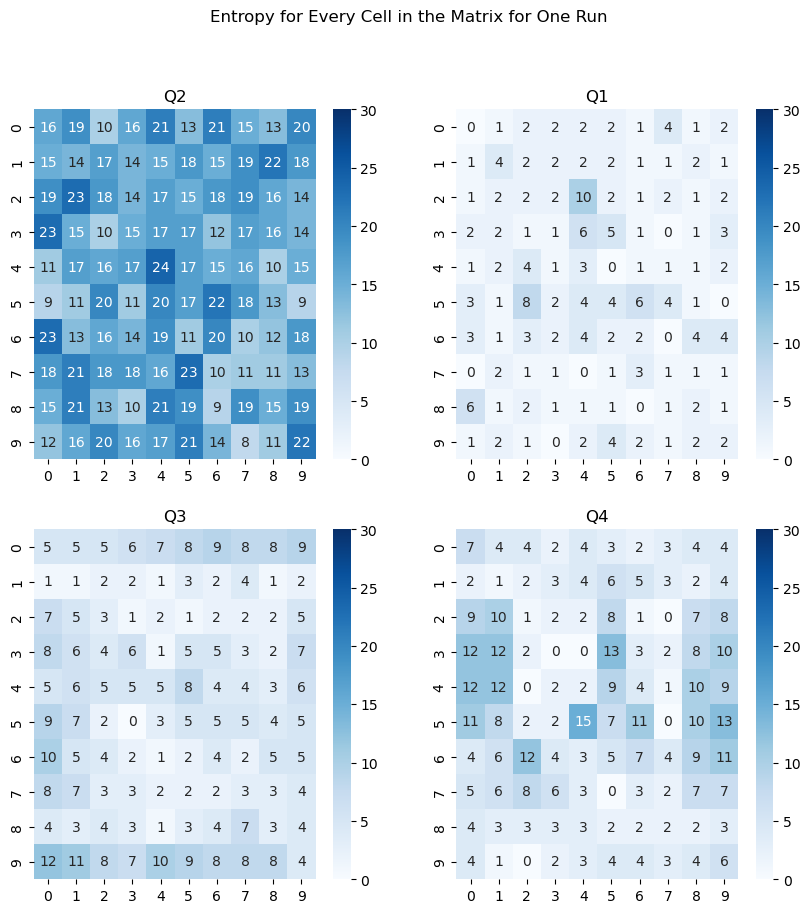

<Figure size 800x800 with 0 Axes>

In [28]:
data_100 = transitions_per_cell[:100]
data_200 = transitions_per_cell[100:200]
data_300 = transitions_per_cell[200:300]
data_400 = transitions_per_cell[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(10,10))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, cmap="Blues", ax=axis[0,1],vmin=0,vmax=30)
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, cmap="Blues", ax=axis[0,0],vmin=0,vmax=30)
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, cmap="Blues", ax=axis[1,0],vmin=0,vmax=30)
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, cmap="Blues", ax=axis[1,1],vmin=0,vmax=30)
axis[1,1].set_title("Q4")
figure.suptitle("Entropy for Every Cell in the Matrix for One Run")
plt.show()

In [43]:
num_df = 198
transitions_per_cell = [0] * 401
for df_counter in range(0, num_df):
   if df_counter%20==0:
        print(df_counter)
   df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
   for i in range(1,df.shape[1]):
    num_cell_transistions = 0
    X = list(df.iloc[:,i])
    for j in range(1,len(X)):
        if X[j] != X[j-1]:
            num_cell_transistions+= 1
    transitions_per_cell[i-1] += num_cell_transistions

avg_trans = [trans/num_df for trans in transitions_per_cell]


0
20
40
60
80
100
120
140
160
180


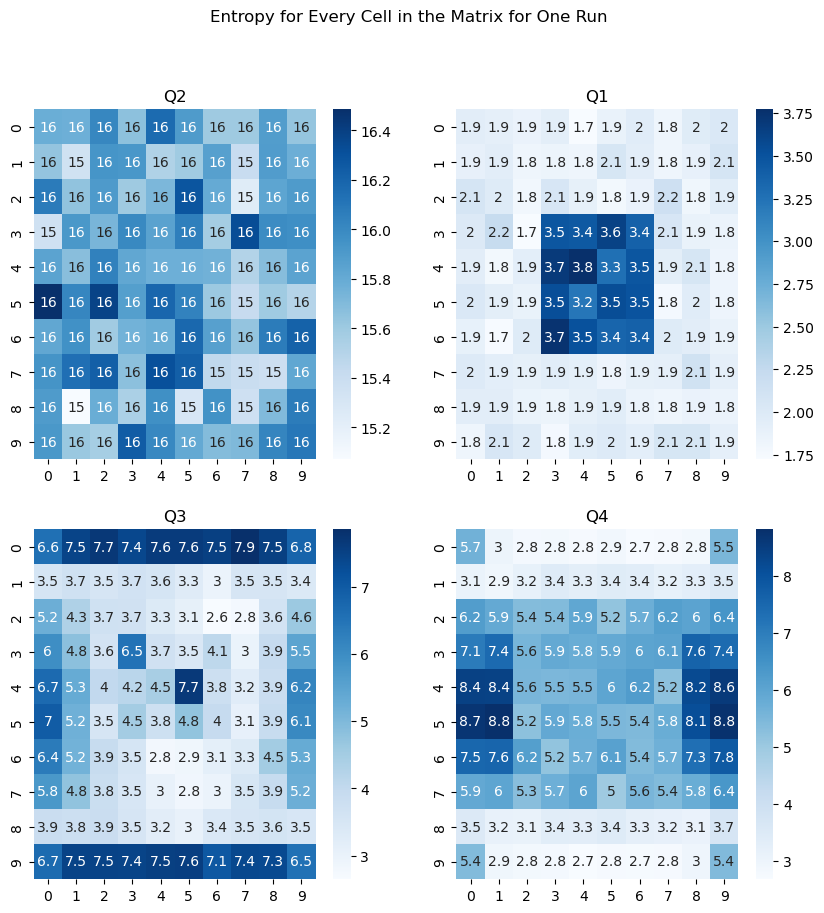

<Figure size 800x800 with 0 Axes>

In [44]:

##avg_trans is the data in list form that we are visualizing 

data_100 = avg_trans[:100]
data_200 = avg_trans[100:200]
data_300 = avg_trans[200:300]
data_400 = avg_trans[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(10,10))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, cmap="Blues", ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Average Transitions Per Cell")
plt.show()

In [24]:
colors_to_numbers = {'gru': 0, 'pty': 1, 'jfk': 2, 'lax': 3, 'las': 4, 'lis': 5, 'bru': 6, 'hkg': 7, 'icn': 8, 'mex': 9}

X = (df.iloc[2,1:].replace(colors_to_numbers))
Y = (df.iloc[3,1:].replace(colors_to_numbers))

print([p for p,v in enumerate(zip(X,Y)) if v[0]^v[1]])


[21, 197, 222, 395]


In [37]:
X = df.iloc[0,1:].replace(colors_to_numbers)
Y = df.iloc[1,1:].replace(colors_to_numbers)
ts_0_to_ts_1_change = [p for p,v in enumerate(zip(X,Y)) if v[0]^v[1]]
Y

Q1-pos0      3
Q1-pos1      1
Q1-pos2      2
Q1-pos3      5
Q1-pos4      2
            ..
Q4-pos395    9
Q4-pos396    2
Q4-pos397    5
Q4-pos398    7
Q4-pos399    3
Name: 1, Length: 400, dtype: int64

In [38]:
df_first = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\FirstTwoTransitions\blackbox_first_transitions_0.csv')
n_time_steps = df_first.shape[0] 
first_transition = [0] * 400

for df_counter in range(1,500):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\FirstTwoTransitions\blackbox_first_transitions_'+str(df_counter)+'.csv')
    for i in range(0, 1):
        X = df.iloc[i,1:].replace(colors_to_numbers)
        Y = df.iloc[i+1,1:].replace(colors_to_numbers)
        ts_0_to_ts_1_change = [p for p,v in enumerate(zip(X,Y)) if v[0]^v[1]]
        for index_of_change in ts_0_to_ts_1_change:
            first_transition[index_of_change] += 1


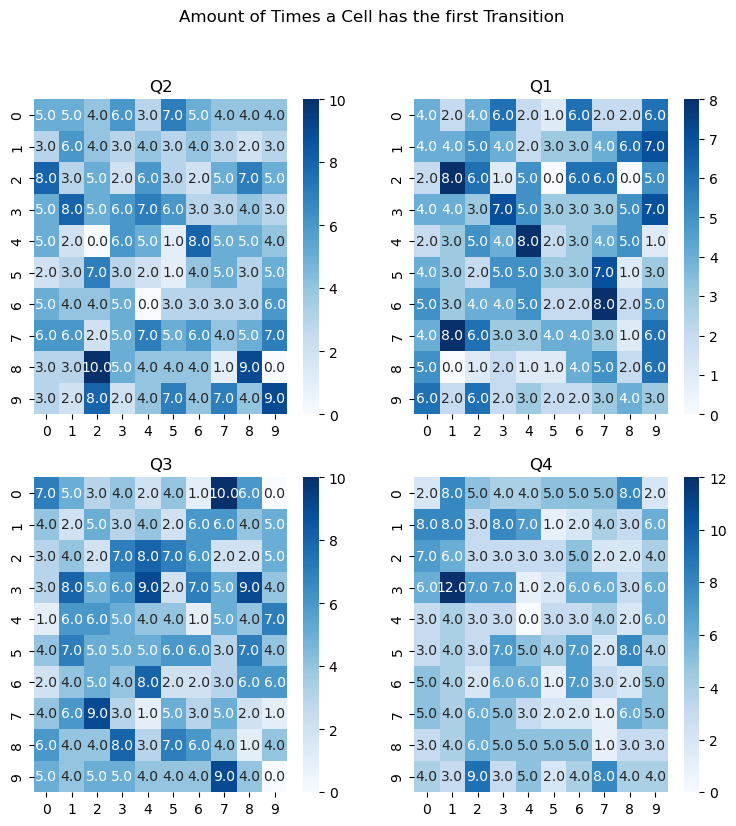

<Figure size 800x800 with 0 Axes>

In [39]:
data_100 = first_transition[:100]
data_200 = first_transition[100:200]
data_300 = first_transition[200:300]
data_400 = first_transition[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(9,9))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, fmt=".1f", cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, fmt=".1f", cmap="Blues",  ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Amount of Times a Cell has the first Transition")
plt.show()

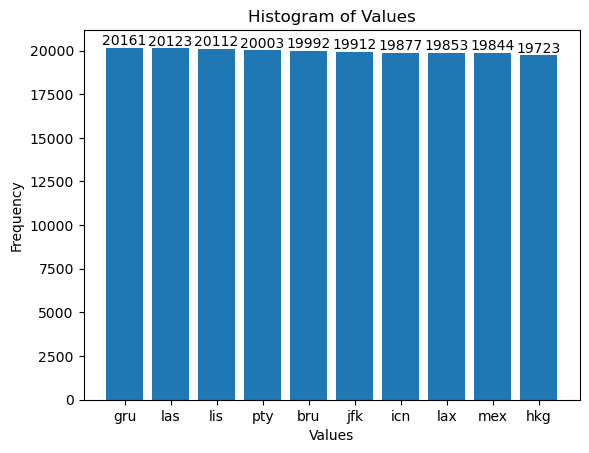

In [59]:

counter_sum = Counter()
for df_counter in range(1,500):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\FirstTwoTransitions\blackbox_first_transitions_'+str(df_counter)+'.csv')
    counter_sum+=Counter(df.iloc[0,1:].tolist())


# df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\FirstTwoTransitions\blackbox_first_transitions_0.csv')
# a = Counter(df.iloc[0,1:].tolist())

labels = list(counter_sum.keys())
freqs = list(counter_sum.values())

labels, freqs = zip(*(sorted(counter_sum.items(),key = lambda x : x[1], reverse = True)))

plt.bar(labels, freqs)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
for i, freq in enumerate(freqs):
    plt.text(labels[i], freq + 0.1, str(freq), ha='center', va='bottom')

plt.show()


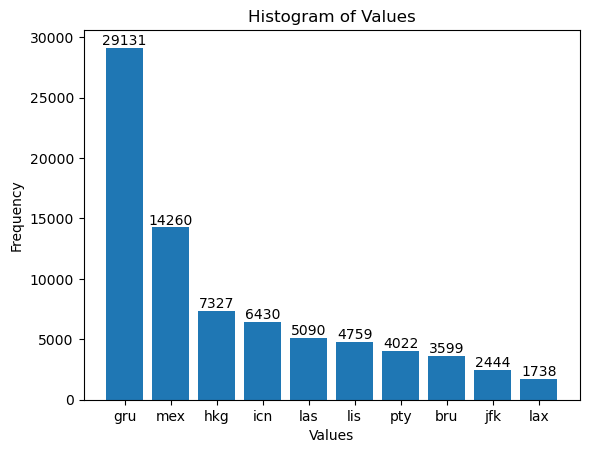

In [67]:
counter_sum = Counter()
for df_counter in range(1,198):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
    counter_sum+=Counter(df.iloc[2000,1:].tolist())


# df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\FirstTwoTransitions\blackbox_first_transitions_0.csv')
# a = Counter(df.iloc[0,1:].tolist())

labels = list(counter_sum.keys())
freqs = list(counter_sum.values())

labels, freqs = zip(*(sorted(counter_sum.items(),key = lambda x : x[1], reverse = True)))

plt.bar(labels, freqs)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
for i, freq in enumerate(freqs):
    plt.text(labels[i], freq + 0.1, str(freq), ha='center', va='bottom')


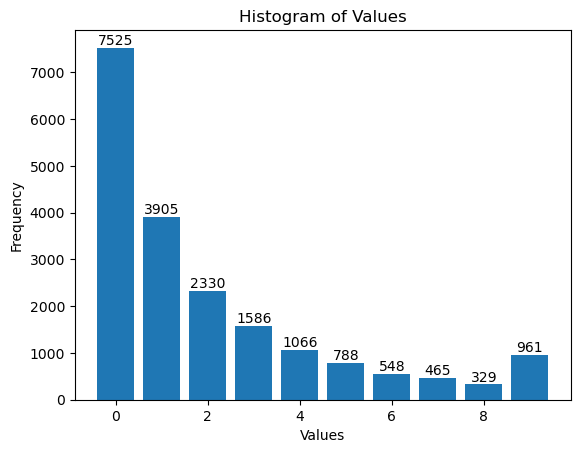

In [70]:
counter_sum = Counter()
colors_to_numbers = {'gru': 0, 'pty': 1, 'jfk': 2, 'lax': 3, 'las': 4, 'lis': 5, 'bru': 6, 'hkg': 7, 'icn': 8, 'mex': 9}
for df_counter in range(1,198):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
    colors_to_numbers = {'gru': 0, 'pty': 1, 'jfk': 2, 'lax': 3, 'las': 4, 'lis': 5, 'bru': 6, 'hkg': 7, 'icn': 8, 'mex': 9}
    df = df.replace(colors_to_numbers)
    counter_sum+=Counter(df.iloc[2000,100:199].tolist())


# df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\FirstTwoTransitions\blackbox_first_transitions_0.csv')
# a = Counter(df.iloc[0,1:].tolist())

labels = list(counter_sum.keys())
freqs = list(counter_sum.values())

labels, freqs = zip(*(sorted(counter_sum.items(),key = lambda x : x[1], reverse = True)))

plt.bar(labels, freqs)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
for i, freq in enumerate(freqs):
    plt.text(labels[i], freq + 0.1, str(freq), ha='center', va='bottom')


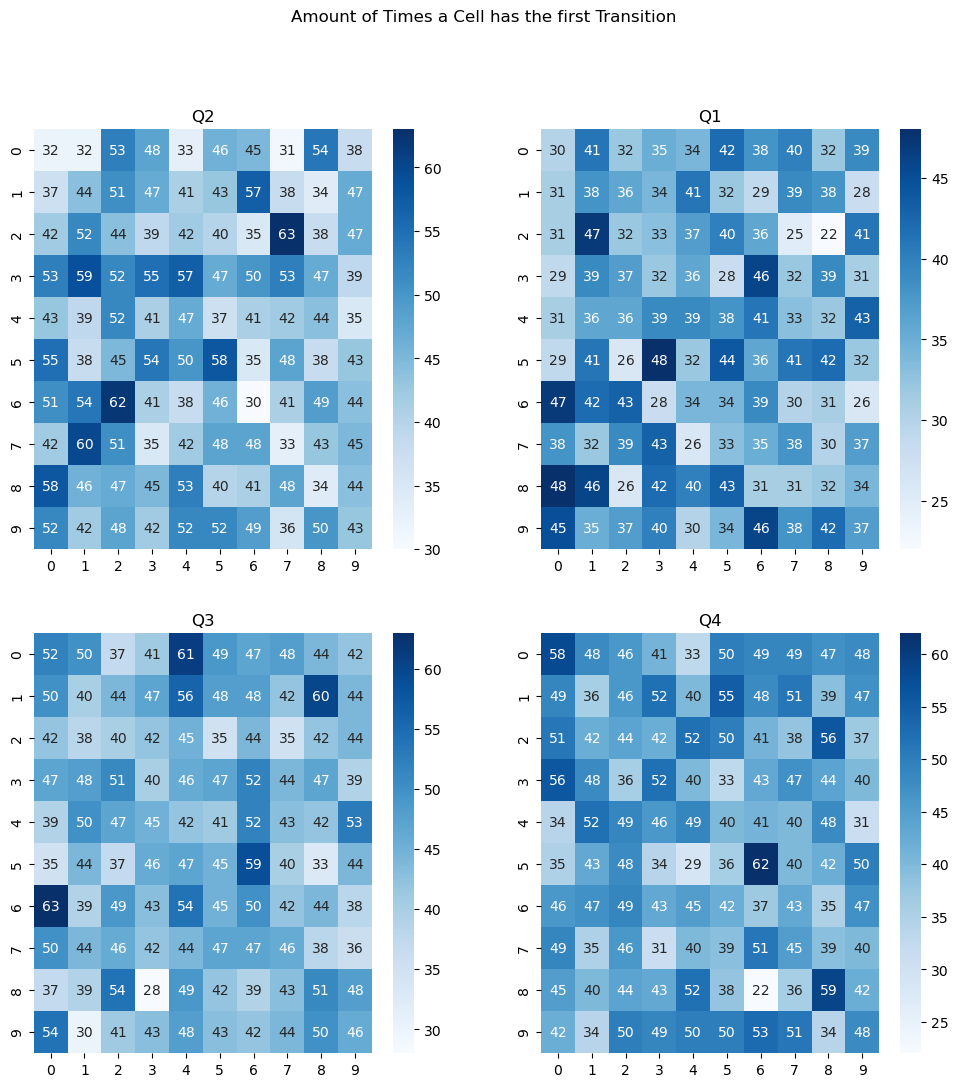

<Figure size 800x800 with 0 Axes>

In [76]:
first_transition = [0] * 400

for df_counter in range(0,5001):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\blackbox_initialstate_5000\blackbox_initialstate_'+str(df_counter)+'.csv')
    for i in range(0, 1):
        X = df.iloc[i,1:].replace(colors_to_numbers)
        Y = df.iloc[i+1,1:].replace(colors_to_numbers)
        ts_0_to_ts_1_change = [p for p,v in enumerate(zip(X,Y)) if v[0]^v[1]]
        for index_of_change in ts_0_to_ts_1_change:
            first_transition[index_of_change] += 1

data_100 = first_transition[:100]
data_200 = first_transition[100:200]
data_300 = first_transition[200:300]
data_400 = first_transition[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(12,12))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True,  cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True,  cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True,  cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True,  cmap="Blues",  ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Amount of Times a Cell has the first Transition")
plt.show()

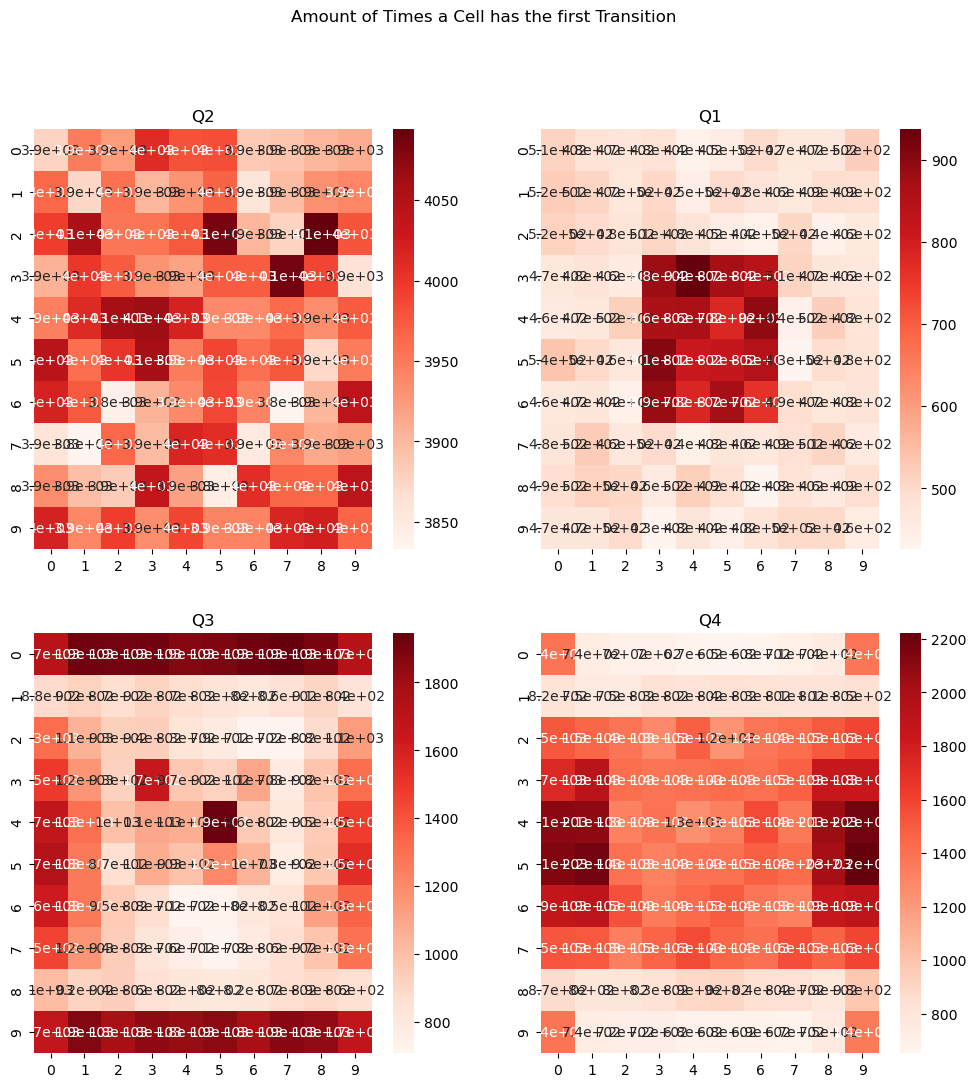

<Figure size 800x800 with 0 Axes>

In [84]:
cell_transistion_counter = [0] * 400

for df_counter in range(0,250):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4_TS2000\blackbox_'+str(df_counter)+'.csv')
    for i in range(0, df.shape[0]-1):
        X = df.iloc[i,1:].replace(colors_to_numbers)
        Y = df.iloc[i+1,1:].replace(colors_to_numbers)
        ts_0_to_ts_1_change = [p for p,v in enumerate(zip(X,Y)) if v[0]^v[1]]
        #print(ts_0_to_ts_1_change)
        for index_of_change in ts_0_to_ts_1_change:
            cell_transistion_counter[index_of_change] += 1


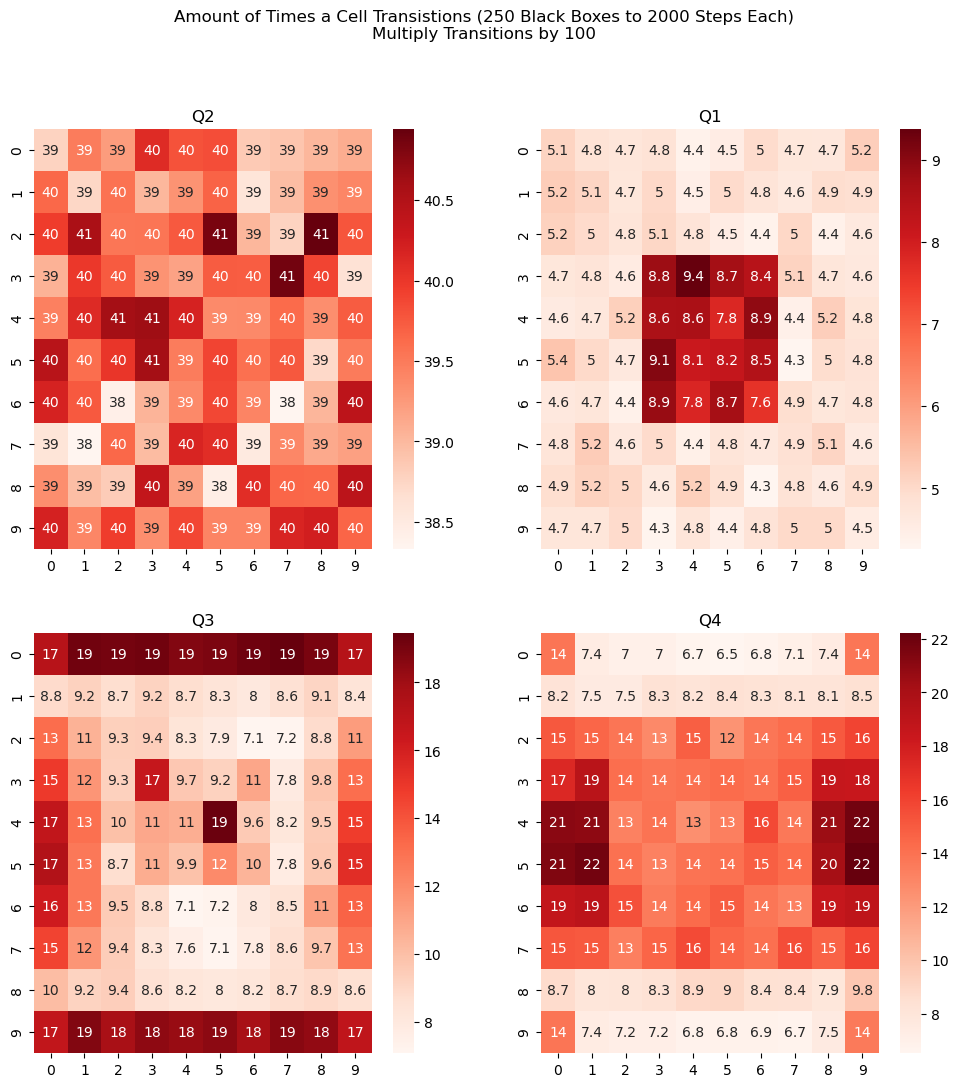

<Figure size 800x800 with 0 Axes>

In [88]:
cell_transistion_counter_div100 = [num/100 for num in cell_transistion_counter]

data_100 = cell_transistion_counter_div100[:100]
data_200 = cell_transistion_counter_div100[100:200]
data_300 = cell_transistion_counter_div100[200:300]
data_400 = cell_transistion_counter_div100[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(12,12))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True,  cmap="Reds", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True,  cmap="Reds", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True,  cmap="Reds", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True,  cmap="Reds",  ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Amount of Times a Cell Transistions (250 Black Boxes to 2000 Steps Each)\nMultiply Transitions by 100")
plt.show()

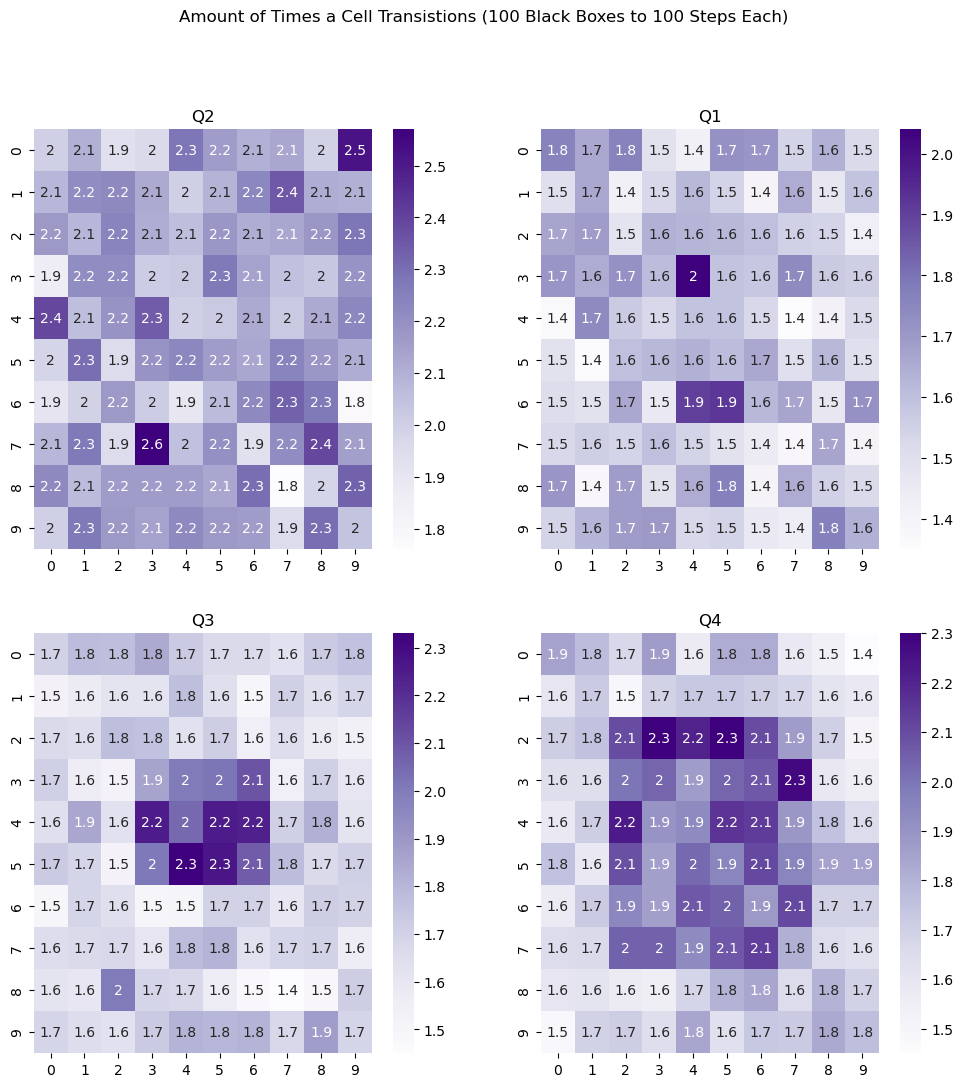

<Figure size 800x800 with 0 Axes>

In [93]:
#running the same plot for 100 black boxes for 100 steps

cell_transistion_counter = [0] * 400

for df_counter in range(0,250):
    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\blackbox_100steps_1000\blackbox_100steps_'+str(df_counter)+'.csv')
    for i in range(0, df.shape[0]-1):
        X = df.iloc[i,1:].replace(colors_to_numbers)
        Y = df.iloc[i+1,1:].replace(colors_to_numbers)
        ts_0_to_ts_1_change = [p for p,v in enumerate(zip(X,Y)) if v[0]^v[1]]
        #print(ts_0_to_ts_1_change)
        for index_of_change in ts_0_to_ts_1_change:
            cell_transistion_counter[index_of_change] += 1

cell_transistion_counter_div100 = [num/100 for num in cell_transistion_counter]

data_100 = cell_transistion_counter_div100[:100]
data_200 = cell_transistion_counter_div100[100:200]
data_300 = cell_transistion_counter_div100[200:300]
data_400 = cell_transistion_counter_div100[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(12,12))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True,  cmap="Purples", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True,  cmap="Purples", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True,  cmap="Purples", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True,  cmap="Purples",  ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Amount of Times a Cell Transistions (100 Black Boxes to 100 Steps Each)")
plt.show()

In [98]:
a = [1,2,3]

print(a[::-1])

[3, 2, 1]
